# [INF2064 – T1: Light spectrum and color reproduction](http://webserver2.tecgraf.puc-rio.br/~mgattass/modvis/t1/t1Color.html)
**Matrícula:** 1821001  
**Aluno:** Djalma L. S. Silva

### Configurações iniciais

In [1]:
from IPython import get_ipython

# Dica: https://stackoverflow.com/questions/23271575/printing-bold-colored-etc-text-in-ipython-qtconsole
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


 ### Importando os pacotes necessários

In [2]:
# Importar e manipular dados
import pandas as pd 

# Manipular dados
import numpy as np

# Ferramentas de visualizacao de dados
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


 ### Importando os dados

Os dados importados a partir do arquivo *all_1nm_data.xlsx* está segmentado em duas folhas:
- all @ 1nm: *contem os espectros, as funções color matching e o iluminante*
- BabelColorAvg: *contem o $\beta$ de cada cor do color checker*

A folha BabelColorAvg foi obtida a partir do arquivo [ColorChecker_RGB_and_spectra.xls](http://www.tecgraf.puc-rio.br/~mgattass/data/ColorChecker_RGB_and_spectra.xls).  
O artigo [RGB Coordinates of Macbeth ColorChecker](http://www.babelcolor.com/index_htm_files/RGB%20Coordinates%20of%20the%20Macbeth%20ColorChecker.pdf) contém a explicação dos diversos dados existentes neste arquivo.

In [3]:
data = pd.read_excel("all_1nm_data.xlsx", header=0, skiprows=3, sheet_name=[0,1])
# data[0] contém a folha "all @ 1nm"
# data[1] contém a folha "BabelColorAvg"

spectral_data = data[0]
colorchecker_data = data[1]

color_names = colorchecker_data.columns[1:]

printmd("**Color Checker**")
print(colorchecker_data.dtypes[1:])

# removendo as colunas que não serão usadas
drop_cols = ["CIE A", "VM(l)", "V'(l)", "x bar.1", "y bar.1", "z bar.1"]
spectral_data.drop(columns=drop_cols, inplace=True)

printmd("**Spectral Data**")
print(spectral_data.dtypes)


**Color Checker**

dark skin               float64
light skin              float64
blue sky                float64
foliage                 float64
blue flower             float64
bluish green            float64
orange                  float64
purplish blue           float64
moderate red            float64
purple                  float64
yellow green            float64
orange yellow           float64
blue                    float64
green                   float64
red                     float64
yellow                  float64
magenta                 float64
cyan                    float64
white 9.5 (.05 D)       float64
neutral 8 (.23 D)       float64
neutral 6.5 (.44 D)     float64
neutral 5 (.70 D)       float64
neutral 3.5 (1.05 D)    float64
black 2 (1.5 D)         float64
dtype: object


**Spectral Data**

nm           int64
CIE D65    float64
x bar      float64
y bar      float64
z bar      float64
dtype: object


### Unindo os dados do espectro com os dados do color checker

In [4]:
# juntando os dados de espectro e color checker
spectral_colorchecker_data = spectral_data.set_index("nm").join( colorchecker_data.set_index("nm") )
spectral_colorchecker_data.dtypes



CIE D65                 float64
x bar                   float64
y bar                   float64
z bar                   float64
dark skin               float64
light skin              float64
blue sky                float64
foliage                 float64
blue flower             float64
bluish green            float64
orange                  float64
purplish blue           float64
moderate red            float64
purple                  float64
yellow green            float64
orange yellow           float64
blue                    float64
green                   float64
red                     float64
yellow                  float64
magenta                 float64
cyan                    float64
white 9.5 (.05 D)       float64
neutral 8 (.23 D)       float64
neutral 6.5 (.44 D)     float64
neutral 5 (.70 D)       float64
neutral 3.5 (1.05 D)    float64
black 2 (1.5 D)         float64
dtype: object

### Plotando os dados
- Das funções $\bar{x}$, $\bar{y}$ , $\bar{z}$ junto com o espectro da cor *magenta*  
- Do iluminante CIE D65

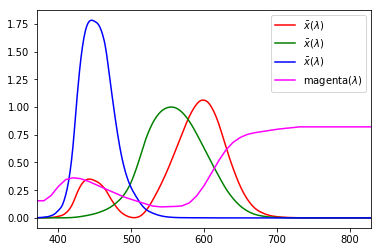

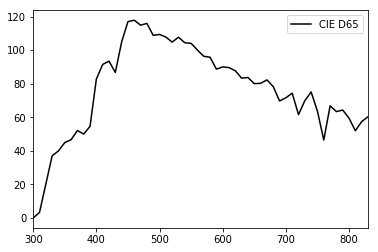

In [5]:
# Dica: https://stackoverflow.com/questions/6518811/interpolate-nan-values-in-a-numpy-array
# Substituindo os valores nan por um interpolação dos valores válidos
def interpolate_nan(color):
    y = np.array(spectral_colorchecker_data[ color ])
    nans, x= np.isnan(y), lambda z: z.nonzero()[0]
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    return y

magenta = interpolate_nan( "magenta" )


# funções 
x_bar = np.array(spectral_data[ 'x bar' ])
y_bar = np.array(spectral_data[ 'y bar' ])
z_bar = np.array(spectral_data[ 'z bar' ])

# iluminante
cie_d65 = np.array(spectral_data['CIE D65'])

nm = range(300, 300+len(x_bar))

# Dica: https://stackoverflow.com/questions/13338550/typing-greek-letters-etc-in-python-plots

# plotando as funções 
plt.plot(nm, x_bar, c = 'r')
plt.plot(nm, y_bar, c = 'g')
plt.plot(nm, z_bar, c = 'b')
plt.plot(nm, magenta, c='magenta')
plt.gca().legend((r'$\bar{x}(\lambda)$', r'$\bar{x}(\lambda)$', r'$\bar{x}(\lambda)$', r'magenta$(\lambda)$'))
plt.axis(xmin=370, xmax=830)
plt.show()

# plotando o iluminante CIE D65
plt.plot(nm, cie_d65, c = 'black', label='CIE D65')
plt.legend()
plt.axis(xmin=300, xmax=830)
plt.show()

### Selecionando somente as linhas com dados válidos
Somente estas linhas possuem todos os dados necessários para a geração do color checker.  
Os dados contidos em BabelColorAvg são amostras de 10nm em 10nm, a partir de 380nm até 730nm

In [6]:
wavelengths = range(380,740,10)
data = spectral_colorchecker_data.loc[ wavelengths ]

data.loc[wavelengths]


CIE D65     x bar     y bar    z bar  dark skin  light skin  blue sky  \
nm                                                                            
380   49.9755  0.001368  0.000039  0.00645   0.054928    0.121190  0.140803   
390   54.6482  0.004243  0.000120  0.02005   0.058196    0.148141  0.184342   
400   82.7549  0.014310  0.000396  0.06785   0.060952    0.180052  0.253856   
410   91.4860  0.043510  0.001210  0.20740   0.062206    0.196914  0.306988   
420   93.4318  0.134380  0.004000  0.64560   0.062053    0.201313  0.324564   
430   86.6823  0.283900  0.011600  1.38560   0.061716    0.203969  0.331075   
440  104.8650  0.348280  0.023000  1.74706   0.061316    0.208183  0.334410   
450  117.0080  0.336200  0.038000  1.77211   0.060896    0.215898  0.333286   
460  117.8120  0.290800  0.060000  1.66920   0.060749    0.229349  0.326504   
470  114.8610  0.195360  0.090980  1.28764   0.060863    0.250034  0.314477   
480  115.9230  0.095640  0.139020  0.81295   0.061358    0.276597  0.300348   
490  108.8110  0.032010  0.208020  0.46518   0.062398    0.304304  0.286846   
500  109.3540  0.004900  0.323000  0.27200   0.064688    0.325236  0.271159   
510  107.8020  0.009300  0.503000  0.15820   0.069666    0.330120  0.251267   
520  104.7900  0.063270  0.710000  0.07825   0.075610    0.314351  0.231410   
530  107.6890  0.165500  0.862000  0.04216   0.078634    0.289336  0.214798   
540  104.4050  0.290400  0.954000  0.02030   0.080475    0.277466  0.200248   
550  104.0460  0.433450  0.994950  0.00875   0.083633    0.279229  0.183783   
560  100.0000  0.594500  0.995000  0.00390   0.090014    0.279908  0.167144   
570   96.3342  0.762100  0.952000  0.00210   0.102437    0.293543  0.155810   
580   95.7880  0.916300  0.870000  0.00165   0.118548    0.343935  0.150152   
590   88.6856  1.026300  0.757000  0.00110   0.133704    0.423568  0.147413   
600   90.0062  1.062200  0.631000  0.00080   0.143039    0.488754  0.143955   
610   89.5991  1.002600  0.503000  0.00034   0.147202    0.523103  0.141336   
620   87.6987  0.854450  0.381000  0.00019   0.151195    0.542374  0.140364   
630   83.2886  0.642400  0.265000  0.00005   0.158255    0.558450  0.140174   
640   83.6992  0.447900  0.175000  0.00002   0.168002    0.575687  0.141333   
650   80.0268  0.283500  0.107000  0.00000   0.178712    0.593813  0.144916   
660   80.2146  0.164900  0.061000  0.00000   0.187641    0.611101  0.149528   
670   82.2778  0.087400  0.032000  0.00000   0.190216    0.622816  0.150637   
680   78.2842  0.046770  0.017000  0.00000   0.187565    0.634289  0.147176   
690   69.7213  0.022700  0.008210  0.00000   0.184661    0.650544  0.141332   
700   71.6091  0.011359  0.004102  0.00000   0.185506    0.672105  0.134179   
710   74.3490  0.005790  0.002091  0.00000   0.191601    0.692825  0.130998   
720   61.6040  0.002899  0.001047  0.00000   0.200459    0.710127  0.133358   
730   69.8856  0.001440  0.000520  0.00000   0.213745    0.727664  0.143824   

      foliage  blue flower  bluish green       ...              red    yellow  \
nm                                             ...                              
380  0.050885     0.158202      0.145329       ...         0.048997  0.055893   
390  0.053654     0.208656      0.185461       ...         0.048123  0.052558   
400  0.055276     0.300129      0.249941       ...         0.046975  0.051514   
410  0.056408     0.379623      0.299415       ...         0.046706  0.051585   
420  0.057415     0.412229      0.323054       ...         0.046643  0.052325   
430  0.058832     0.424513      0.339699       ...         0.046921  0.053849   
440  0.060468     0.429127      0.357762       ...         0.046996  0.056014   
450  0.061553     0.428518      0.383281       ...         0.046329  0.059183   
460  0.062486     0.421513      0.420233       ...         0.045404  0.066276   
470  0.063456     0.405380      0.465667       ...         0.044641  0.080727   
480  0.065080     0.380876     

### Obtendo o XYZ a partir do espectro

As informações utilizadas nesta função estão na página 124 do material do curso [Luz e Cor](http://webserver2.tecgraf.puc-rio.br/~mgattass/modvis/ppt/01_Cor.pdf)

In [7]:
from scipy import integrate

def get_XYZ(color):
    
    x = np.array(wavelengths)
    deltaLambda = len(wavelengths)
    
    def K():
        y = data['CIE D65'] * data['y bar']
        #return 1.0 / integrate.simps(y, x)
        return 1.0 / (deltaLambda * np.sum(y))

    def coordinate(column):
        y = data['CIE D65'] * data[color] * data[column]
        #return integrate.simps(y, x)
        return deltaLambda * np.sum(y)
    
    X = coordinate('x bar')
    Y = coordinate('y bar')
    Z = coordinate('z bar')
    k = K()

    X = k*X
    Y = k*Y
    Z = k*Z

    # Conforme as propriedades da página 138 dos slides de cor
    """
    XYZ = X+Y+Z
    _x,_y,_z = X/XYZ, Y/XYZ, Z/XYZ
    print("x+y+z =",_x+_y+_z, XYZ, k)
    #"""

    return np.array([X,Y,Z])
    

### Obtendo o RGB a partir do XYZ

Os passos 1,2 e 3 estão descritos nas páginas 210,211 e 212 do material do curso [Luz e Cor](http://webserver2.tecgraf.puc-rio.br/~mgattass/modvis/ppt/01_Cor.pdf)

In [8]:
def XYZ_to_sRGB(XYZ):
    # Slides 210 (Passo 1), 211 (Passo 2) e 212 (Passo 3)

    # Passo 1
    M = np.array([
        [3.2410, -1.5374, -0.4986],
        [-0.9692, 1.8760, 0.0416],
        [0.0556, -0.2040, 1.0570]
    ])
    sRGB = np.dot(M, XYZ)

    # Passo 2
    sRGB_gamma = np.zeros(shape=(3))
    p = 1.0/2.4
    def toNonLinear(channel):
        if sRGB[channel] <= 0.00304:
            sRGB_gamma[channel] = 12.92 * sRGB[channel]
        else:
            sRGB_gamma[channel] = 1.055 * np.power(sRGB[channel], p) - 0.055
        
        # Garantindo que o valor calculado esteja entre 0 e 1
        sRGB_gamma[channel] = np.minimum(1.0, np.maximum(0.0, sRGB_gamma[channel]))        

    toNonLinear(0) # R
    toNonLinear(1) # G
    toNonLinear(2) # B

    # Passo 3
    #   Este passo está desabilitado, 
    #   pois as cores no matplotlib devem estar entre 0 e 1
    #
    # sRGB_gamma *= 255.0
    # return sRGB_gamma.astype("int")

    return sRGB_gamma
    

### Alguns resultados

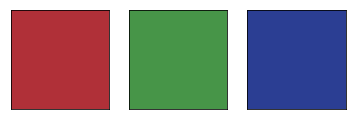

In [9]:
XYZ = get_XYZ('red')
color0 = XYZ_to_sRGB(XYZ)

XYZ = get_XYZ('green')
color1 = XYZ_to_sRGB(XYZ)

XYZ = get_XYZ('blue')
color2 = XYZ_to_sRGB(XYZ)

fig = plt.figure()
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0], facecolor=color0.tolist(), xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[0, 1], facecolor=color1.tolist(), xticks=[], yticks=[])
ax3 = fig.add_subplot(gs[0, 2], facecolor=color2.tolist(), xticks=[], yticks=[])

### Gerando o ColorChecker

In [10]:
import matplotlib.patches as patches

# print(data.columns)
# print(color_names)

color_checker = np.ones(shape=(24, 3))
for cid in range(0, len(color_names)):
    XYZ = get_XYZ( color_names[cid])
    color_checker[cid] = XYZ_to_sRGB( XYZ )


### Gerando imagem do ColorChecker

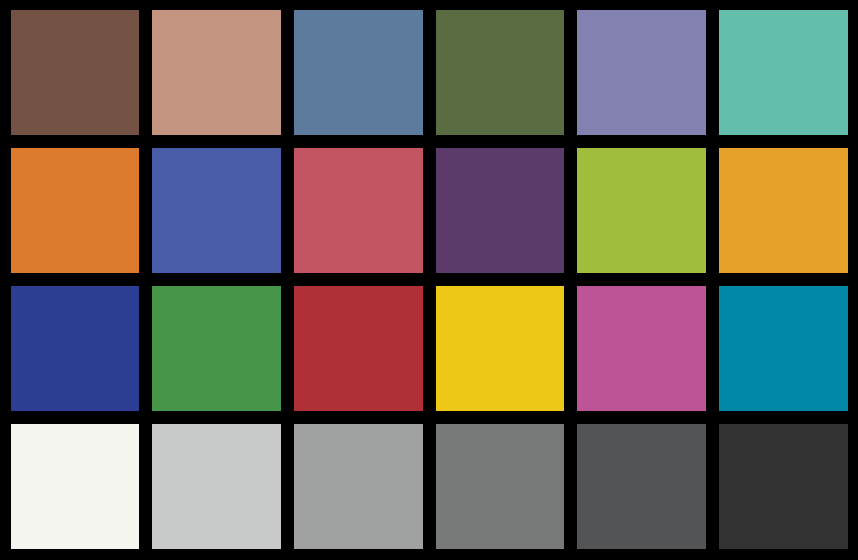

In [11]:

fig11 = plt.figure(figsize=(15, 15), constrained_layout=False, facecolor="black")
outer_grid = fig11.add_gridspec(6, 6, wspace=0.1, hspace=0.1)
for i in range(len(color_names)):
    rgb =  (color_checker[i].tolist())
    ax = fig11.add_subplot(outer_grid[i], facecolor=rgb)
    ax.set_xticks([])
    ax.set_yticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)
    fig11.add_subplot(ax)
plt.show()



